### Higher Diploma in Science - Data Analytics 2020/21

### Fundamentals of Data Analysis Project

#### Prepared by: Fiona Lee 
#### Due Date - 8 January 2021


***

### Fundamentals of Data Analysis - Project Instructions:

In  this  project  you  must  perform  and  explain  simple  linear  regression  using  Python on the power production dataset available on Moodle.  

The goal is to accurately predict wind turbine power output from wind speed values using the data set as a basis.

Your submission must be in the form of a git repository containing, at a minimum, thefollowing items:

1.  Jupyter notebook that performs simple linear regression on the data set.
2.  In that notebook, an explanation of your regression and an analysis of its accuracy.
3.  Standard items in a git repository such as a README.

To enhance your submission, you might consider comparing simple linear regression to other types of regression on this data set. 

***

### Import Modules 
***

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame

<BR>

### Import the Dataset
***

In [2]:
df = pd.read_csv('Wind-Power.csv')
pd.set_option('max_colwidth',100)
print(df)

      speed  power
0     0.000    0.0
1     0.125    0.0
2     0.150    0.0
3     0.225    0.0
4     0.275    0.0
..      ...    ...
495  24.775    0.0
496  24.850    0.0
497  24.875    0.0
498  24.950    0.0
499  25.000    0.0

[500 rows x 2 columns]


In [3]:
#Check if characters in the data imported is the same type
print(df.dtypes)

speed    float64
power    float64
dtype: object


In [4]:
#check to see if there are any empty cells in the dataframe
print(df.isnull())

     speed  power
0    False  False
1    False  False
2    False  False
3    False  False
4    False  False
..     ...    ...
495  False  False
496  False  False
497  False  False
498  False  False
499  False  False

[500 rows x 2 columns]


In [5]:
#check for corrupt data
print ("power shape = ",df.shape)

power shape =  (500, 2)


In [6]:
#Re-name the columns from the original dataset
df.rename(columns={'speed':'Speed_Mph'},inplace = True)
df.rename(columns={'power':'Power_KWph'},inplace = True)

In [7]:
#Add Power/Speed Column
df['Power:Speed'] = (df ['Power_KWph'] / df ['Speed_Mph']) #Add Power/Speed Column
df.replace(to_replace = np.nan, value = 0.00)  
pd.set_option("display.precision", 3)
df.style.set_properties(subset=["Power_KWph", "Speed_Mph"], **{'text-align': 'centre'});
#https://www.codegrepper.com/code-examples/python/how+to+align+column+name+to+center+in+pandas+dataframe
#del df['power/speed']; #delete additional column

<BR>

<BR>

### High Level Analysis
***

In [8]:
#Show the entire dataset sorted by Power:Speed Ratio
import pandas as pd
pd.set_option("display.max_rows", None, "display.max_rows", None)#Show the entire dataset
pd.set_option("display.precision", 3) #Round the results to 3 decimal places
df.sort_values(by=['Power:Speed'], inplace=True, ascending=False)#Sort the dataset in descending order
#https://datatofish.com/sort-pandas-dataframe/
df.style.set_properties(subset = ["Power KWph", "Speed Mph"], **{'text-align': 'right'})
#https://www.kite.com/python/answers/how-to-print-an-entire-pandas-dataframe-in-python
print ("")
print(df)


     Speed_Mph  Power_KWph  Power:Speed
14       0.701       9.746       13.903
5        0.325       4.331       13.326
6        0.400       5.186       12.965
13       0.676       7.974       11.796
10       0.551       6.498       11.793
9        0.526       5.553       10.557
11       0.576       5.241        9.099
17       0.801       7.271        9.077
19       0.851       7.350        8.637
7        0.450       3.826        8.502
12       0.626       4.220        6.741
23       1.001       6.511        6.504
323     16.466      96.592        5.866
326     16.617      97.274        5.854
341     17.267     100.831        5.840
354     17.643     102.322        5.800
331     16.842      97.532        5.791
347     17.467     100.889        5.776
301     15.315      87.230        5.696
355     17.793     100.429        5.644
334     16.967      95.593        5.634
317     16.091      90.412        5.619
369     18.544     104.161        5.617
329     16.717      93.698        5.605

<BR>

In [9]:
#Show basic summary information
print ("")
pd.set_option("display.precision", 0)
# https://realpython.com/pandas-groupby/
print(df.describe())



       Speed_Mph  Power_KWph  Power:Speed
count        500         500          499
mean          13          48            3
std            7          42            2
min            0           0            0
25%            6           5            1
50%           13          42            4
75%           19          94            5
max           25         114           14


<BR>

In [10]:
#identify any trends in the results
print("")
pd.set_option("display.precision", 2)
# https://realpython.com/pandas-groupby/
df.style.set_properties(subset = ["Power_KWph", "Speed_Mph"], **{'text-align': 'center'})
print (df.groupby(['Power_KWph']).agg(['count']))



           Speed_Mph Power:Speed
               count       count
Power_KWph                      
0.00              49          48
0.07               1           1
0.11               1           1
0.12               1           1
0.13               1           1
0.67               1           1
0.80               1           1
0.82               1           1
0.93               1           1
0.93               1           1
0.95               1           1
1.00               1           1
1.03               1           1
1.04               1           1
1.05               1           1
1.21               1           1
1.36               1           1
1.49               1           1
1.53               1           1
1.53               1           1
1.61               1           1
1.63               1           1
1.68               1           1
1.83               1           1
1.91               1           1
2.00               1           1
2.00               1           1
2.03     

<BR>

In [11]:
#Number of values where wind speed is bigger than 3.5 and active power is zero. 
#If wind speed is bigger than 3.5 and active power is zero, this means turbine is out of order. we must eliminate these.
#print(len(df["Power_KWph"][(df["Power_KWph"]==0)&(df["Speed_Mph"]>3.5)]))
print ("The number of results where Power is Zero -",(len(df["Power_KWph"][(df["Power_KWph"]==0)])))
print(len(df["Power_KWph"][(df["Power_KWph"]>0)&(df["Power_KWph"]<10)]))
#print(len(df["Power_KWph"][(df["Power_KWph"]==0)]))

The number of results where Power is Zero - 49
127


### Visualise the Data
***

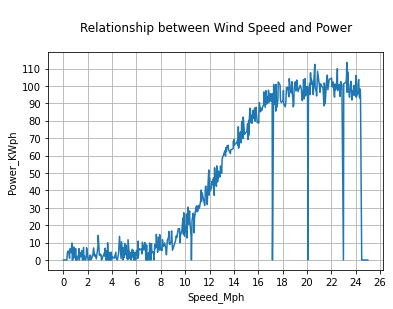

In [12]:
import matplotlib.pyplot as plt
plt.title('\nRelationship between Wind Speed and Power\n')
plt.xticks([0, 2, 4, 6,8,10,12,14,16,18,20,22,24,26])
plt.yticks([0, 10,20,30,40,50,60,70,80,90,100,110,120,130,140,150])
plt.grid(True)
sns.lineplot (x=df.Speed_Mph,y=df.Power_KWph)
plt.show()

<BR>

<BR>

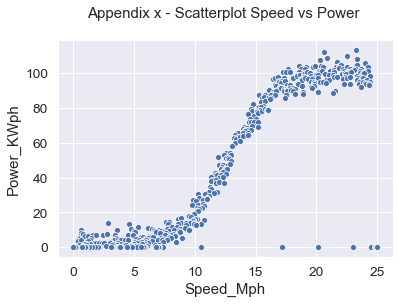

In [14]:
print("")
sns.set (style = "whitegrid", palette ='Set1')
sns.set_style ("ticks")
sns.set(font_scale = 1.25)
ax = sns.scatterplot (x = "Speed_Mph", y ="Power_KWph", data = df)
ax.set_title ("Appendix x - Scatterplot Speed vs Power \n" , fontsize = 15)
a4_dims = (11.7, 8.27)
fig, ax = sns.figsize = a4_dims
plt.show()
print ("")


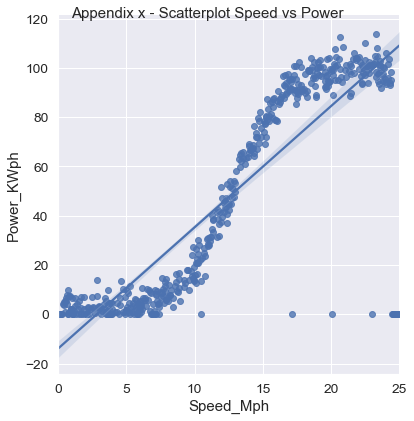

In [15]:
# SCATTERPLOT - WITH REGRESSION LINES
# Ref Source: https://stackoverflow.com/questions/46307941/how-can-i-add-title-on-seaborn-lmplot
print ("")
sns.set_style ("whitegrid")
sns.set_style ("ticks")
sns.set(font_scale = 1.25)
ax = sns.lmplot (x = "Speed_Mph" , y = "Power_KWph" , palette = 'Set1', data = df, height = 6)
ax.fig.suptitle ("Appendix x - Scatterplot Speed vs Power\n\n", fontsize = 15)
a4_dims = (11.7, 8.27)
fig, ax = sns.figsize = a4_dims
plt.show()
print ("")

<BR>

<BR>

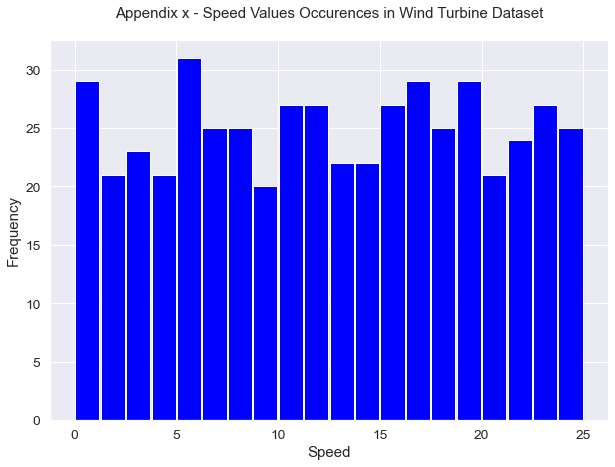

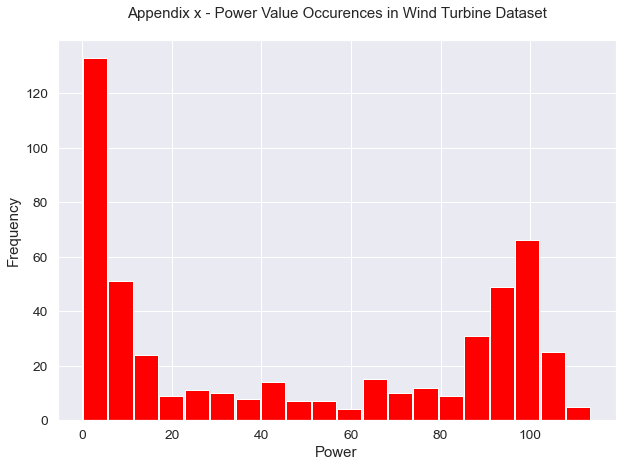

In [16]:
print ("")
plt.figure(figsize = (10, 7)) 
x = df ["Speed_Mph"] 
plt.hist(x, bins = 20, color = "blue", rwidth = 0.95) 
plt.title("Appendix x - Speed Values Occurences in Wind Turbine Dataset\n", fontsize = 15) 
plt.xlabel("Speed", fontsize = 15) 
plt.ylabel("Frequency", fontsize = 15) 
plt.show()
print ("")
plt.figure(figsize = (10, 7)) 
x = df ["Power_KWph"] 
plt.hist(x, bins = 20, color = "red", rwidth = 0.95) 
plt.title("Appendix x - Power Value Occurences in Wind Turbine Dataset\n", fontsize = 15) 
plt.xlabel("Power", fontsize = 15) 
plt.ylabel("Frequency", fontsize = 15) 
plt.show()

***

### Plot Power and Speed results on the same axis
<BR>

NameError: name 'ax3' is not defined

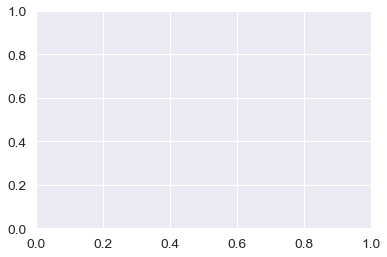

In [18]:
#https://stackoverflow.com/questions/11640243/pandas-plot-multiple-y-axes

fig, ax = plt.subplots()
rspine = ax3.spines ['right']
rspine.set_position (('axes', 5))
ax3.set_frame_on (True)
ax3.patch.set_visible (False)
fig.subplots_adjust(right = 2)
df.Power_KWph.plot(ax = ax, style = 'b-',label = "Power Produced")
ax.legend(loc = 0)
plt.xlabel("\n Sample Number")
plt.ylabel("Power Produced \n")
# same ax as above since it's automatically added on the right

df.Speed_Mph.plot(ax = ax, style = 'r-', label = "Wind Speed", secondary_y = True)

plt.ylabel("\n Wind Speed (mph)")
plt.title("\n Relationship between the rate of growth of wind speed vs. power produced by wind turbines \n\n" , fontsize = 20)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.legend (loc = "center left", frameon = True)
bbox_to_anchor=(10, 500)
plt.show();


NameError: name 'Speed_Mph' is not defined

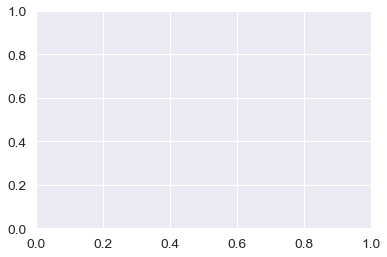

In [19]:
from matplotlib import rc
rc('mathtext', default='regular')

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(Speed_Mph, '-', label = 'Wind_Speed')
#ax.plot(power, '-', label = 'Power Produced')
ax2 = ax.twinx()
ax2.plot(Power_KWph, '-', label = 'Power_Produced')
ax.legend(loc=0)
ax.grid()
#ax.set_xlabel("Time (mph)")
ax.set_ylabel("Wind_Speed")
ax2.set_ylabel("Power_Produced")
ax2.set_ylim(0, 35)
ax.set_ylim(-20,100)
plt.show()

***

In [ ]:


plt.plot(df.power, 'b')
plt.plot (df.speed,'r')
# 'r.' is plot in red dots rather than straight lines, 'r' is plot red line
plt.ylabel("Some numbers")

#creates a label called "some numbers"
plt.show()

### Predict expected power based on a given speed
<BR>

***

### Predict expected speed based on a given power
<BR>

***

***

#### End